In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt
%matplotlib inline
import plotly.express as px
import plotly.graph_objects as go
import warnings
warnings.filterwarnings('ignore')
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose  
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from matplotlib.pylab import rcParams
rcParams['figure.figsize']=10,6

In [2]:
df=pd.read_excel(r"C:\Users\Ramana Reddy (Rakhi)\OneDrive\Desktop\crypto project\zcash.xlsx")
df

ticker       date     open     high      low    close
0       ZEC 2017-01-01  48.0000  49.0100  47.3800  49.0000
1       ZEC 2017-01-02  49.0000  53.0100  47.4100  50.0800
2       ZEC 2017-01-03  50.0800  55.3000  47.5000  50.0000
3       ZEC 2017-01-04  50.0000  54.7000  49.1100  53.1400
4       ZEC 2017-01-05  53.1400  58.0100  44.0100  49.9900
...     ...        ...      ...      ...      ...      ...
2733    ZEC 2024-06-26  20.2054  20.4478  19.4942  19.9264
2734    ZEC 2024-06-27  19.9146  20.9209  19.7458  20.8776
2735    ZEC 2024-06-28  20.8820  21.1982  20.6169  20.9981
2736    ZEC 2024-06-29  20.9682  20.9682  20.2669  20.3254
2737    ZEC 2024-06-30  20.3254  20.9310  19.7975  20.4483

[2738 rows x 6 columns]

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2738 entries, 0 to 2737
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ticker  2738 non-null   object        
 1   date    2738 non-null   datetime64[ns]
 2   open    2738 non-null   float64       
 3   high    2738 non-null   float64       
 4   low     2738 non-null   float64       
 5   close   2738 non-null   float64       
dtypes: datetime64[ns](1), float64(4), object(1)
memory usage: 128.5+ KB


In [4]:
df.describe()

open         high          low        close
count  2738.000000  2738.000000  2738.000000  2738.000000
mean    108.815272   114.411646   102.869261   108.804118
std     103.227134   110.103490    95.336739   103.233527
min      19.603700    19.907200    17.977100    19.623900
25%      39.705000    41.361725    38.222500    39.641550
50%      65.025000    67.815000    62.143100    65.045000
75%     145.147500   151.285000   137.980000   145.047250
max     757.170000   799.470000   690.160000   757.170000

In [5]:
df.set_index('date',inplace=True)
indexedDataset=df.drop(columns=['ticker','open','high','low'])
indexedDataset=indexedDataset.resample('M').mean()
indexedDataset


close
date                  
2017-01-31   43.772258
2017-02-28   33.363214
2017-03-31   51.055806
2017-04-30   68.686333
2017-05-31  134.084194
...                ...
2024-02-29   23.750059
2024-03-31   31.097958
2024-04-30   24.309683
2024-05-31   24.172381
2024-06-30   22.573330

[90 rows x 1 columns]

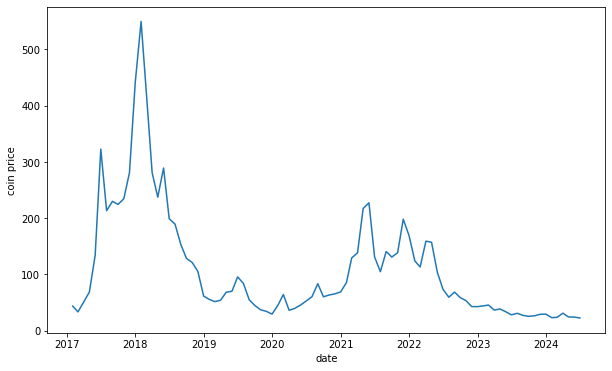

In [6]:
plt.xlabel('date')
plt.ylabel('coin price')
plt.plot(indexedDataset)

In [7]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    #determing rolling statistics
    moving_avg=timeseries.rolling(window=12).mean()
    moving_std = timeseries.rolling(window=12).std()
    
    #plot rolling statistics
    #orig=plt.plot(timeseries,color='blue',label='Original')
    #mean=plt.plot(moving_avg,color='red',label='rolling mean' )
    #std=plt.plot(moving_std,color='black',label='rolling std')
    #plt.legend(loc='best')
    #plt.show(block=False)
    #perform Dickey fuller test;
    print("results of Dickey-fuller test:")
    dftest=adfuller(timeseries['close'],autolag='AIC')
    dfoutput = pd.Series(dftest[0:4],index=['Test statistic','p-value','lags used','number of Observations used'])
    for key,value in dftest[4].items():
        dfoutput['Critical value (%s)'%key]=value
    print(dfoutput)

In [8]:
test_stationarity(indexedDataset)

results of Dickey-fuller test:
Test statistic                 -5.148291
p-value                         0.000011
lags used                      12.000000
number of Observations used    77.000000
Critical value (1%)            -3.518281
Critical value (5%)            -2.899878
Critical value (10%)           -2.587223
dtype: float64


# the p-value is p<0.05, then we can say that our data is stationary

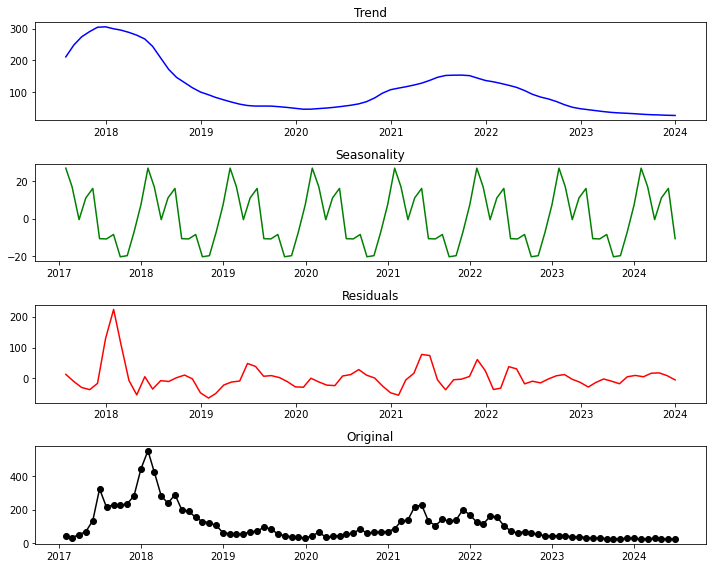

In [9]:
decomposition = seasonal_decompose(indexedDataset, model='additive')
plt.figure(figsize=(10,8))

plt.subplot(4, 1, 1)
plt.plot(decomposition.trend, label='Trend', color='blue')
plt.title('Trend')

plt.subplot(4, 1, 2)
plt.plot(decomposition.seasonal, label='Seasonality', color='green')
plt.title('Seasonality')

plt.subplot(4, 1, 3)
plt.plot(decomposition.resid, label='Residuals', color='red')
plt.title('Residuals')

plt.subplot(4, 1, 4)
plt.plot(indexedDataset.index, indexedDataset.values, marker='o', linestyle='-', label='Original', color='black')
plt.title('Original')

plt.tight_layout()
plt.show()

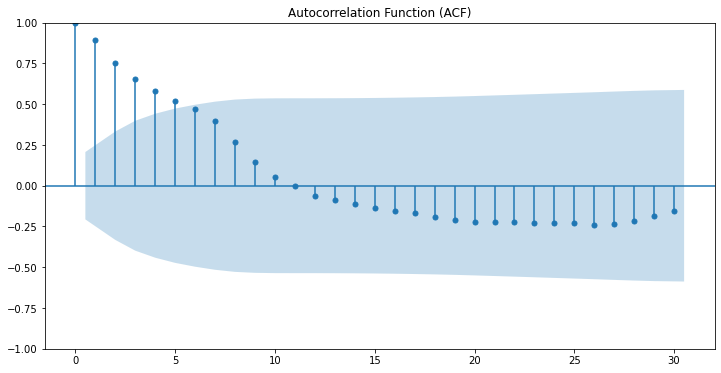

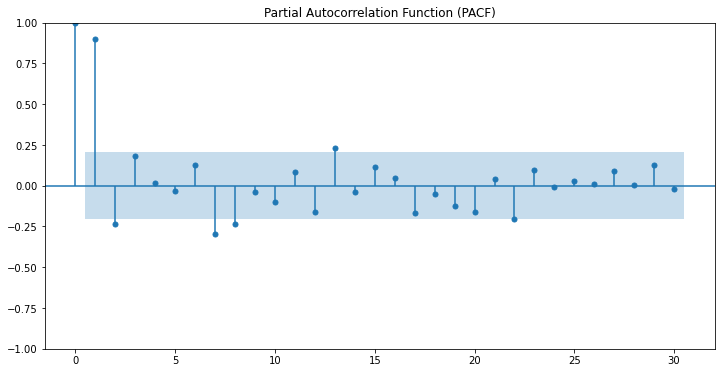

In [10]:
import statsmodels.api as sm

# Plot ACF
fig, ax1 = plt.subplots(figsize=(12, 6))
sm.graphics.tsa.plot_acf(indexedDataset['close'], lags=30, ax=ax1)
plt.title('Autocorrelation Function (ACF)')

# Plot PACF
fig, ax2 = plt.subplots(figsize=(12, 6))
sm.graphics.tsa.plot_pacf(indexedDataset['close'], lags=30, ax=ax2)
plt.title('Partial Autocorrelation Function (PACF)')

plt.show()

In [11]:
# Split data into train and test sets
X = np.arange(len(indexedDataset)).reshape(-1, 1)
y = indexedDataset.values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [12]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(72, 1)
(72, 1)
(18, 1)
(18, 1)


C:\Users\Ramana Reddy (Rakhi)\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   72
Model:                 ARIMA(5, 0, 5)   Log Likelihood                -373.807
Date:                Tue, 27 Aug 2024   AIC                            771.614
Time:                        16:40:22   BIC                            798.934
Sample:                             0   HQIC                           782.491
                                 - 72                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        128.2402     45.386      2.826      0.005      39.286     217.195
ar.L1          0.3853      0.139      2.773      0.006       0.113       0.658
ar.L2          1.5810      0.073     21.780      0.0

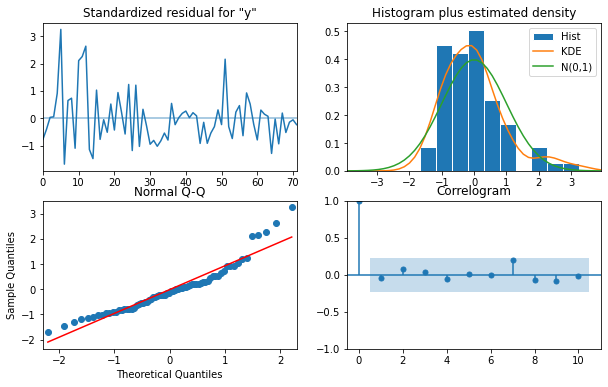

In [21]:
from statsmodels.tsa.arima.model import ARIMA
model=ARIMA(y_train,order=(5,0,5))
results_ARIMA=model.fit()
predicion=results_ARIMA.plot_diagnostics()
print(results_ARIMA.summary())
 

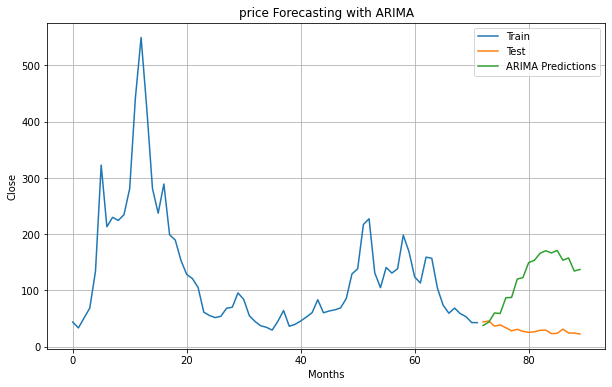

In [22]:
arima_predictions =results_ARIMA.forecast(steps=len(X_test))
# Plot predictions
plt.figure(figsize=(10, 6))
plt.plot(X_train, y_train, label='Train')
plt.plot(X_test, y_test, label='Test')
plt.plot(X_test, arima_predictions, label='ARIMA Predictions')
plt.title('price Forecasting with ARIMA')
plt.xlabel('Months')
plt.ylabel('Close')
plt.legend()
plt.grid(True)
plt.show()

In [23]:
print(mean_absolute_error(X_test,arima_predictions))
print(mean_squared_error(X_test,arima_predictions))
print(r2_score(X_test,arima_predictions))

50.944399217735025
3310.242805388414
-121.9811568565355
